# Bandits

In [52]:
import numpy as np

class Bandit:

    def __init__(self, mean, std):
        self.mean = mean
        self.std = std
        self.pulls = 0
        self.totalReward = 0

    def _sampleDistribution(self):
        return np.random.normal(self.mean, self.std)
    
    def pull(self):
        self.pulls += 1
        sample = self._sampleDistribution()
        self.totalReward += sample
        return sample
    
    def actionValue(self):
        if self.pulls > 0:
            return self.totalReward / self.pulls
        return 0
    
    def __lt__(self, other):
        return self.actionValue() < other.actionValue()
    
    def __gt__(self, other):
        return self.actionValue() > other.actionValue()
    
    def __eq__(self, other):
        return self.actionValue() == other.actionValue()

In [53]:
bandit = Bandit(5,1)
for i in range(100):
    bandit.pull()

print(bandit.actionValue())

4.951665334450193


# Test

In [69]:
class Test:

    def __init__(self, steps, epsilon, means):
        self.steps = steps
        self.epsilon = epsilon
        self.rewards = [0]
        self.pulls = 0
        self.bestPossibleCumReward = [0]
        self.bandits = []
        self.correctBanditPulled = [0]
        for m in (means):
            mean = m
            std = 1
            bandit = Bandit(mean, std)
            self.bandits.append(bandit)
        
        self.bestBandit = max(self.bandits, key=lambda b: b.mean)
    
    def perform(self):
        while (self.pulls < self.steps):
            bandit = None

            if (np.random.uniform(0,1) < self.epsilon):
                bandit = self.bandits[np.random.randint(0, len(self.bandits))]
            else:
                bandit = self.bandits[np.argmax(self.bandits)]
            
            reward = bandit.pull()
            self.pulls += 1
            self.rewards.append(reward)

            if (bandit is self.bestBandit):
                self.correctBanditPulled.append(self.correctBanditPulled[-1] + 1)
                self.bestPossibleCumReward.append(self.bestPossibleCumReward[-1]+reward)
            else:
                self.correctBanditPulled.append(self.correctBanditPulled[-1])
                self.bestPossibleCumReward.append(self.bestPossibleCumReward[-1]+self.bestBandit._sampleDistribution())
    
    def stats(self):
        stats = {}
        stats['rewards'] = np.array(self.rewards)
        stats['correctBanditPulled'] = np.array(self.correctBanditPulled)
        return stats




In [71]:
test1 = Test(10000, 0.1, 10)
test1.perform()


TypeError: 'int' object is not iterable

# Experiment

In [80]:
def expriment(epsilons, experiments, steps, nBandits):
    means = [np.random.uniform(-2,2) for i in range(nBandits)]
    results = {}
    for e in epsilons:
        for i in range(experiments):
            test = Test(steps, e, means)
            test.perform()
            stats = test.stats()
            if e not in results:
                results[e] = stats
            else:
                results[e]['rewards'] = (results[e]['rewards'] + (stats['rewards']-results[e]['rewards'])/(i+1))
                results[e]['correctBanditPulled'] = (results[e]['correctBanditPulled'] + (stats['correctBanditPulled']-results[e]['correctBanditPulled'])/(i+1))

    return results
results = expriment([0.1, 0.01, 1], 200, 10000, 10)
print(results)

{0.1: {'rewards': array([0.        , 0.73079305, 1.01249341, ..., 1.74491677, 1.73386811,
       1.70450278]), 'correctBanditPulled': array([0.000000e+00, 5.000000e-03, 3.500000e-02, ..., 8.653455e+03,
       8.654360e+03, 8.655300e+03])}, 0.01: {'rewards': array([0.        , 0.89886306, 1.20060238, ..., 1.94458606, 1.94858699,
       1.89857386]), 'correctBanditPulled': array([   0.   ,    0.   ,    0.   , ..., 6628.545, 6629.39 , 6630.25 ])}, 1: {'rewards': array([ 0.        ,  0.01476497, -0.08367037, ...,  0.00733358,
       -0.02939678, -0.06807312]), 'correctBanditPulled': array([0.00000e+00, 1.05000e-01, 2.10000e-01, ..., 9.98150e+02,
       9.98245e+02, 9.98350e+02])}}


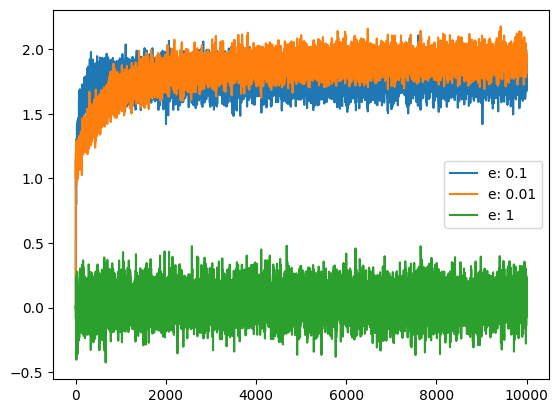

In [82]:
import matplotlib.pyplot as plt

for e,data in results.items():
    y = data['rewards']
    x = np.arange(0, len(y))
    plt.plot(x, y, label=f"e: {e}")
plt.legend()
plt.show()

In [229]:
def alpha(n):
    if n == 1:
        return 0
    return 1/n
sum = 0
eles = [5,6,7]
# for ele in eles:
#     sum += ele*np.prod([(1-alpha(n)) for n in np.arange(2, len(eles)+1)])

# print(sum)

for t in range(0, len(eles)): 
    multiplier = np.prod([1-alpha(n) for n in range(t+1, len(eles)+1)]) 
    # if (t+1 == len(eles)):
        
    print(multiplier)
    if (alpha(t+1) == 0):
        sum += eles[t]*multiplier
    else:
        sum += eles[t]*alpha(t+1)*multiplier
print(sum)


0.33333333333333337
0.33333333333333337
0.6666666666666667
4.222222222222222
